<a href="https://colab.research.google.com/github/napoles-uach/ML-FCQ/blob/main/MNIST_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [8]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [9]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 10s 19ms/step - loss: 0.2599 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1026 - accuracy: 0.9706
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0673 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0490 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0366 - accuracy: 0.9892


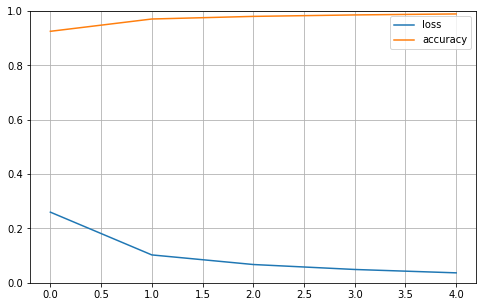

In [10]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9803


[0.0681387186050415, 0.9803000092506409]

In [12]:
test_digits = test_images[0:10]

In [13]:
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 91ms/step


In [14]:
n=0
print('valor predicho: ',predictions[n].argmax() )
print('valor verdadero: ',test_labels[n]) #valor verdadero

valor predicho:  7
valor verdadero:  7


In [15]:
model.save("mi_modelo.h5")

In [16]:
model = keras.models.load_model('mi_modelo.h5')